In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

submission = pd.read_csv('sample_submission_V2.csv')

In [2]:
temp = train.copy()

In [3]:
## matchtype을 랭크, 노말, 이벤트로 나누기 랭크

def UPPER_matchType(x):
    if x == 'squad-fpp' or x == 'duo' or x == 'solo-fpp'or x == 'squad' or x == 'duo-fpp' or x=='solo':
        return 'Rank'

    elif x == 'normal-solo-fpp' or x == 'normal-duo-fpp' or x == 'normal-squad-fpp' or x == 'normal-duo' or x == 'normal-squad' or x == 'normal-solo':
        return 'Normal'

    else:
        return 'Event'

temp['UPPER_matchType'] = temp['matchType'].map(UPPER_matchType)

In [4]:
def fpp_tpp(x):
    if x == 'squad-fpp' or x == 'normal-squad-fpp' or x== 'normal-solo-fpp' or x == 'solo-fpp' or x == 'duo-fpp' or x == 'normal-duo-fpp'or x == 'crashfpp' or x == 'flarefpp':
        return 'fpp'

    elif x == 'duo'  or x == 'normal-duo' or x == 'normal-squad' or x == 'normal-solo' or x == 'squad'  or x=='solo' or x == 'crashtpp' or x == 'flaretpp':
        return 'tpp'

temp['fpp_tpp'] = temp['matchType'].map(fpp_tpp)
temp.fpp_tpp.value_counts()

fpp    3320989
tpp    1125977
Name: fpp_tpp, dtype: int64

In [5]:
temp.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'UPPER_matchType',
       'fpp_tpp'],
      dtype='object')

# matchID 및 groupID 분석

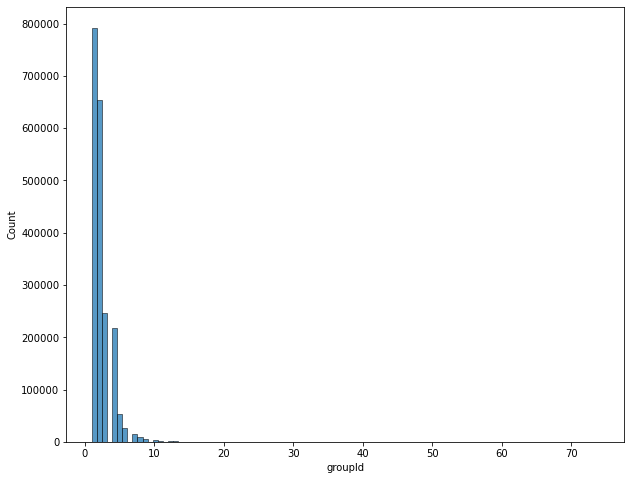

8c74f72fedf5ff     1
560721dd818e1d     1
bbc4014ce629d4     1
1a27f418a31f02     1
5e2f241190638f     1
                  ..
e52a2e6ca30474    36
7385e5fe214021    49
128b07271aa012    64
b8275198faa03b    72
14d6b54cdec6bc    74
Name: groupId, Length: 2026745, dtype: int64

In [6]:
#train.groupId.value_counts() 최대치 : 74
data2 = train.groupId.value_counts(ascending=True)
plt.figure(figsize=(10,8))
sns.histplot(data = data2, bins=100)
plt.show() 
data2

배틀그라운드에선 matchType 분석 결과

Solo / Duo / Squad      +    시점 기준 (FPP / TPP)     +     게임 모드 (Rank/Normal/Event) 이렇게 분류할 수 있음

해당 데이터는 2018년 기준으로 경쟁(랭크 시스템)이 베타시스템으로 도입되었던 시기로 판단

https://namu.wiki/w/PUBG:%20BATTLEGROUNDS/%EB%9E%AD%ED%81%AC/%EC%83%9D%EC%A1%B4%20%ED%83%80%EC%9D%B4%ED%8B%80#fn-%EC%B0%B8%EA%B3%A0

rankPoints : 생존 타이틀 시스템 : 2018년 10월 3일에 도입되고 2020년 5월 20일에 폐지된 랭크 시스템에 적용되는 포인트로 판단

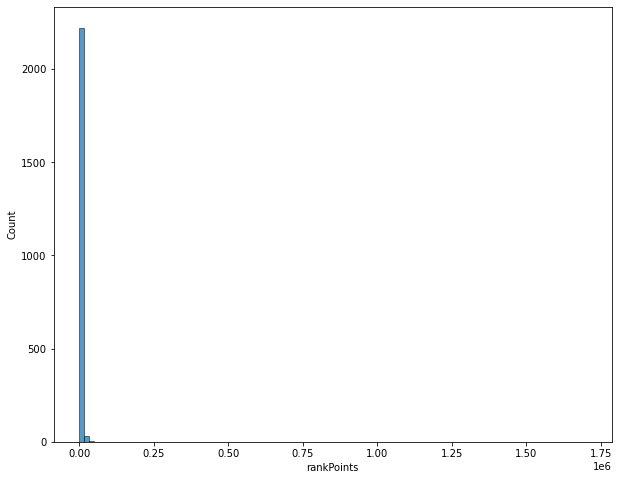

In [7]:

data2 = train.rankPoints.value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data = data2, bins=100)
plt.show() 

In [8]:
train.rankPoints.value_counts()

-1       1701810
 1500     299741
 0         89509
 1480      48857
 1494      42612
          ...   
 2578          1
 2898          1
 2697          1
 2439          1
 2962          1
Name: rankPoints, Length: 2262, dtype: int64

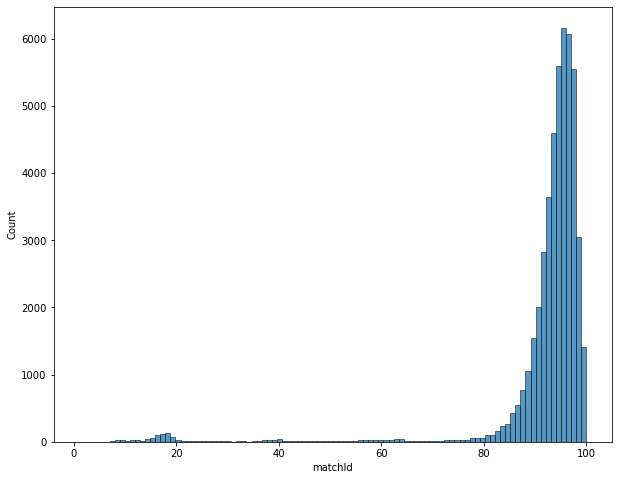

In [9]:

matchID_num = train.matchId.value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data = matchID_num, bins=100)
plt.show() 

In [10]:
matchID_num[matchID_num < 50]

2da28eebf601db    49
bd027a3de6d813    49
657d210cc8bed9    49
4094eeb44670d8    49
5360762aa9fe02    49
                  ..
39d2800dad8ae6     6
9f2b49358564ea     6
8aa5066c4b6a79     5
e5a77433bc436f     2
224a123c53e008     1
Name: matchId, Length: 1067, dtype: int64

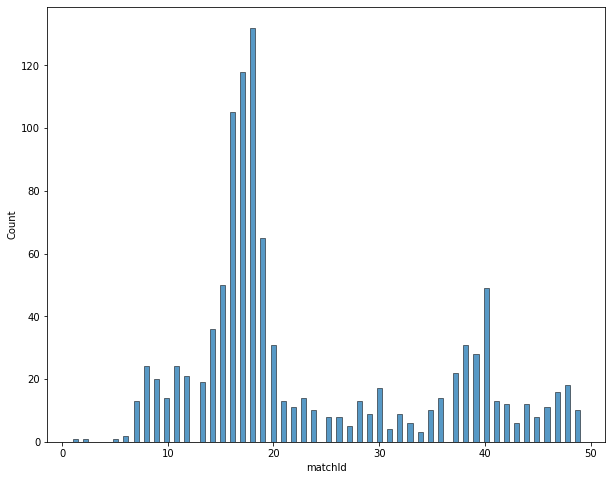

In [11]:
winner = train.loc[train.winPlacePerc == 1,:]

match50 = matchID_num[matchID_num < 50]

plt.figure(figsize=(10,8))
sns.histplot(data = match50 , bins=100)
plt.show() 

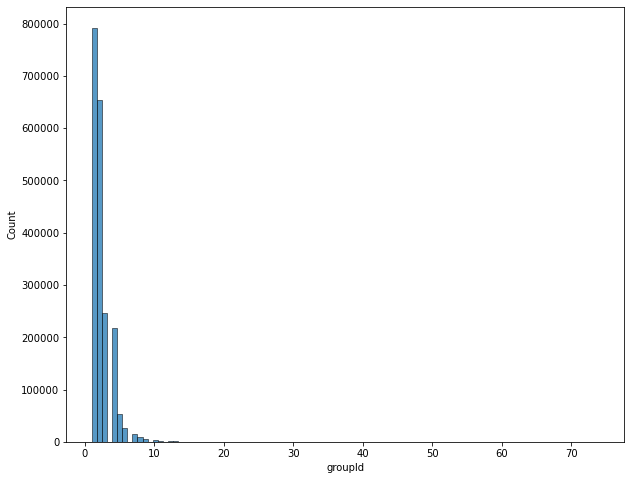

In [12]:
groupID_num = train.groupId.value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data = groupID_num, bins=100)
plt.show() 

In [13]:
groupID_num

14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026745, dtype: int64

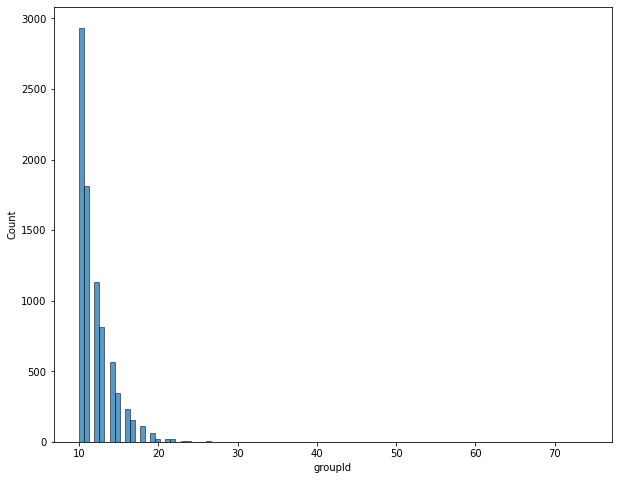

In [14]:
group2 = groupID_num[groupID_num > 9]
plt.figure(figsize=(10,8))
sns.histplot(data = group2, bins=100)
plt.show() 

groupID 중복 수
1개 : 792277 Solo/Duo/Squad
2개 : 654211 Duo/Squad
3개 : 247137 Squad
4개 : 217540 Squad

5개 : 53426
6개 : 25875
7개 : 14788
8개 : 8422
9개 : 4832
10개 : 2935
11개 : 1812
12개 : 1134
13개 : 812
14개 : 562
15개 : 343
16개 : 229
.
.
.


In [15]:
#groupID_num[groupID_num == 1] 첫번째 groupID d3532b0e5138b2의 분석
df = train.copy()
df[df['groupId']=='d3532b0e5138b2']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4123975,2dec2d45220504,d3532b0e5138b2,241d3df3750cc5,0,1,200.0,1,1,4,23,...,0,0.0,0,0.0,0,0,181.9,3,0,0.3404


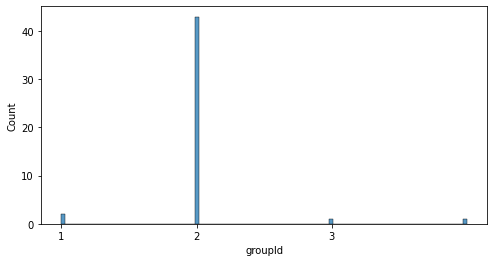

In [16]:
#95명인 게임 - Duo-fpp / 근데 그룹ID가 3명 이상인 얘들이 있음
m95 = df[df['matchId']=='241d3df3750cc5']


plt.figure(figsize=(8,4))
sns.histplot(data = m95['groupId'].value_counts(), bins=100)
plt.xticks(range(1, 4, 1))
plt.show() 

#627dd8c92f1b1b    4
#2f6cb8acd4e71a    3

In [17]:
m95['matchType']

28280      duo-fpp
31842      duo-fpp
137259     duo-fpp
139388     duo-fpp
155287     duo-fpp
            ...   
4206745    duo-fpp
4333844    duo-fpp
4341204    duo-fpp
4347295    duo-fpp
4371204    duo-fpp
Name: matchType, Length: 95, dtype: object

In [18]:
m95_2 = m95['groupId'].value_counts()
m95_2[m95_2 > 2]

627dd8c92f1b1b    4
2f6cb8acd4e71a    3
Name: groupId, dtype: int64

In [19]:
df[df['groupId']=='627dd8c92f1b1b']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1224376,8a02cc3bee72d5,627dd8c92f1b1b,241d3df3750cc5,0,0,0.0,0,0,0,94,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0
2060351,191f1fd24bbe0e,627dd8c92f1b1b,241d3df3750cc5,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0
3808040,81ffbbbdfbf83f,627dd8c92f1b1b,241d3df3750cc5,0,0,0.0,0,0,0,95,...,0,0.0,0,0.0,0,0,0.47,1,0,0.0
4371204,3a9f2a15699426,627dd8c92f1b1b,241d3df3750cc5,0,0,0.0,0,0,0,93,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0


In [20]:
df[df['groupId']=='2f6cb8acd4e71a']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1565040,371c29e5fa0019,2f6cb8acd4e71a,241d3df3750cc5,0,0,0.00,0,0,0,85,...,0,0.0,0,0.00,0,0,30.51,1,0,0.0851
1865640,4ba56dd219a81b,2f6cb8acd4e71a,241d3df3750cc5,0,0,97.89,1,0,0,39,...,0,0.0,0,0.00,0,0,81.16,1,0,0.0851
3722873,9555844b906011,2f6cb8acd4e71a,241d3df3750cc5,1,0,35.22,0,0,0,84,...,0,0.0,0,28.52,0,0,23.62,1,0,0.0851


In [21]:
groupID_num[groupID_num == 1]

d3532b0e5138b2    1
bc1ca3c5fbfd29    1
b563805619861e    1
7344e598e4a627    1
7a058956432c17    1
                 ..
5941df37c809be    1
ab58ce5a22ed97    1
7b5f1742ce18a5    1
ed3a2c5863cee3    1
8c74f72fedf5ff    1
Name: groupId, Length: 792277, dtype: int64

In [22]:
gr16 = groupID_num[groupID_num == 16] #커스텀 게임으로 판단
gr16

c6e53d91dc9fd4    16
d8bb90cb54116f    16
b0688f46f2971f    16
ea41b6d2a93e67    16
59eaf4661ab2f4    16
                  ..
e7b5fe76776eff    16
dca37009204981    16
5152931db16c5f    16
34e1b70001b6b3    16
b40694fe2008ac    16
Name: groupId, Length: 229, dtype: int64

In [23]:
df[df['groupId']=='c6e53d91dc9fd4']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
43457,f5ca0c12ef15a7,c6e53d91dc9fd4,fb9f622215e151,0,0,109.400,0,0,0,11,...,0,0.0,0,0.0,0,0,0.0,9,0,0.0
256057,ab07b67478f8f6,c6e53d91dc9fd4,fb9f622215e151,0,0,0.000,0,0,0,12,...,0,0.0,0,0.0,0,0,0.0,0,0,0.0
656112,887e25a569bf0b,c6e53d91dc9fd4,fb9f622215e151,0,0,0.000,0,0,0,9,...,0,0.0,0,0.0,0,0,0.0,3,0,0.0
1467002,34bd1ffad5cb74,c6e53d91dc9fd4,fb9f622215e151,0,0,195.100,0,0,0,8,...,0,0.0,0,0.0,0,0,0.0,8,0,0.0
1524410,7f3cf3671aac94,c6e53d91dc9fd4,fb9f622215e151,0,0,69.120,0,0,0,5,...,0,0.0,0,0.0,0,0,0.0,8,0,0.0
1580218,0aa310d38207e8,c6e53d91dc9fd4,fb9f622215e151,0,0,0.000,0,0,1,3,...,0,0.0,0,0.0,0,0,0.0,3,0,0.0
1582279,7db479af0ddf62,c6e53d91dc9fd4,fb9f622215e151,0,0,244.600,0,0,0,4,...,0,0.0,0,0.0,0,0,0.0,4,0,0.0
1732583,3b9d9e54768791,c6e53d91dc9fd4,fb9f622215e151,0,0,553.300,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,3,0,0.0
1838486,e517db6a085e42,c6e53d91dc9fd4,fb9f622215e151,0,0,13.650,0,0,0,10,...,0,0.0,0,0.0,0,0,0.0,3,0,0.0
1875870,55da047c293266,c6e53d91dc9fd4,fb9f622215e151,0,0,0.000,0,0,0,16,...,0,0.0,0,0.0,0,0,0.0,1,0,0.0


In [24]:
m16 = df[df['matchId']=='fb9f622215e151']
m16['matchType']

43457      solo
256057     solo
656112     solo
1467002    solo
1524410    solo
1580218    solo
1582279    solo
1732583    solo
1838486    solo
1875870    solo
2106442    solo
3046176    solo
3915445    solo
4243851    solo
4361836    solo
4405728    solo
Name: matchType, dtype: object

In [25]:
df[df['groupId']=='56b19d136443a5']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3097938,a63cdba7ede6f1,56b19d136443a5,7913a50a3a4ad9,0,0,0.0,0,0,0,95,...,0,0.0,0,0.0,0,0,0.00,0,1494,0.0
4326689,47a69dc8c312e2,56b19d136443a5,7913a50a3a4ad9,0,0,0.0,0,0,0,96,...,0,0.0,0,0.0,0,0,10.32,1,1363,0.0


In [26]:
match2 = df[df['matchId']=='7913a50a3a4ad9'] 
match2['groupId'].value_counts()


#match2['matchType']

#df[df['groupId']=='627dd8c92f1b1b']

56b19d136443a5    2
c91e74040559e6    1
b86eaa27275eb0    1
63357c38c9b41c    1
67550af5d998e7    1
                 ..
d8e2c34d0d3b2b    1
07d53c244095ee    1
9e9b1f1091342a    1
c36ff61b1d6ad7    1
8ab3b9ac3c86cc    1
Name: groupId, Length: 95, dtype: int64

# Feature별 가설 설정

'Id'
'groupId'
'matchId'
'assists'
'boosts'
'damageDealt'
'DBNOs'
'headshotKills'
'heals'
'killPlace'
'killPoints'
'kills'
'killStreaks'
'longestKill'
'matchDuration'
'matchType'
'maxPlace'
'numGroups'
'rankPoints'
'revives'
'rideDistance'
'roadKills'
'swimDistance'
'teamKills'
'vehicleDestroys'
'walkDistance'
'weaponsAcquired'
'winPoints'
'winPlacePerc'

In [27]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [28]:
df_solo = df[(df['matchType']=='solo') | (df['matchType']=='solo-fpp') | (df['matchType']=='normal-solo-fpp') | (df['matchType']=='normal-solo')]
df_solo 

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,d05b0c4b2ff311,8248fa2552457b,88c002b589d411,0,0,203.500,0,0,0,32,...,0,0.0,0,0.00,0,0,1559.00,5,0,0.5000
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.100,0,0,0,58,...,0,0.0,0,0.00,0,0,2146.00,6,1502,0.5306
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.680,0,0,0,89,...,0,0.0,0,0.00,0,0,40.25,1,0,0.0842
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,...,0,0.0,0,0.00,0,0,81.70,6,0,0.2935


In [29]:
solo_num = df_solo['matchId'].value_counts()
print("솔로 참여 인원 수 [평균]     : " , round(solo_num.mean(),1))
print("솔로 참여 인원 수 [중간값]   : " , solo_num.median())
print("솔로 참여 인원 수 [표준편차] : " , round(solo_num.std(),1))
print("솔로 참여 인원 수 [최빈값]   : " , solo_num.mode())

솔로 참여 인원 수 [평균]     :  89.0
솔로 참여 인원 수 [중간값]   :  95.0
솔로 참여 인원 수 [표준편차] :  20.9
솔로 참여 인원 수 [최빈값]   :  0    97
Name: matchId, dtype: int64


In [30]:
solo_num2 = df_solo['groupId'].value_counts()
print("솔로 그룹 인원 수 [평균]     : " , round(solo_num2.mean(),1))
print("솔로 그룹 인원 수 [중간값]   : " , solo_num2.median())
print("솔로 그룹 인원 수 [표준편차] : " , round(solo_num2.std(),1))
print("솔로 그룹 인원 수 [최빈값]   : " , solo_num2.mode())

솔로 그룹 인원 수 [평균]     :  1.0
솔로 그룹 인원 수 [중간값]   :  1.0
솔로 그룹 인원 수 [표준편차] :  0.4
솔로 그룹 인원 수 [최빈값]   :  0    1
Name: groupId, dtype: int64


In [31]:
print("솔로 그룹 수의 적정 범위 예측 : ", round(solo_num.mean()/solo_num2.mean(),1)," ~ ",round(solo_num.median()/solo_num2.median(),1))

솔로 그룹 수의 적정 범위 예측 :  85.7  ~  95.0


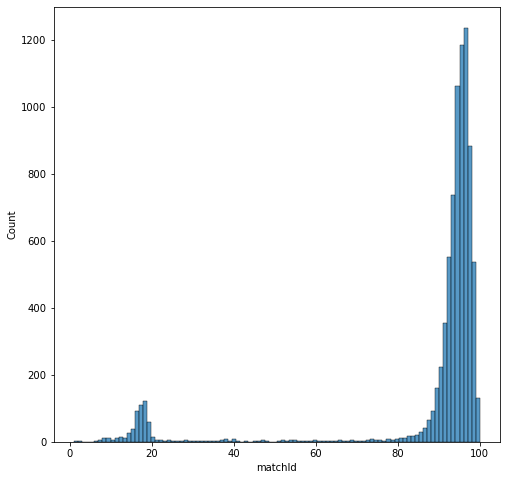

In [32]:
plt.figure(figsize=(8,8))
sns.histplot(data = solo_num, bins=100)
#plt.xticks(range(1, 4, 1))
plt.show() 

In [33]:
df_duo = df[(df['matchType']=='duo') | (df['matchType']=='duo-fpp') | (df['matchType']=='normal-duo-fpp') | (df['matchType']=='normal-duo')]
df_duo

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.0,0,0,161.8,2,0,0.7755
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,...,0,0.0,0,0.0,0,0,451.7,1,0,0.4043
15,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,...,1,0.0,0,0.0,0,0,105.1,5,0,0.2766
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,...,0,2332.0,0,0.0,0,0,1264.0,4,1494,0.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446948,445aaa1ddc858e,b1efcbdb7ce674,05f6cd4077cd68,1,3,736.50,4,1,2,7,...,0,0.0,0,0.0,0,0,1685.0,3,1500,0.7917
4446949,138e004749faf9,dbe0096979e393,5256cd7403054e,0,0,100.00,1,0,0,32,...,0,0.0,0,0.0,0,0,424.6,3,0,0.1458
4446955,b9155a229aedfd,570d9414a536f3,0c5ab888689674,0,0,0.00,0,0,0,60,...,0,604.8,0,0.0,0,0,1158.0,3,0,0.4792
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,...,1,0.0,0,0.0,0,0,363.7,2,0,0.4583


In [34]:
duo_num = df_duo['matchId'].value_counts()
print("듀오 참여 인원 수 [평균]     : " , round(duo_num.mean(),1))
print("듀오 참여 인원 수 [중간값]   : " , duo_num.median())
print("듀오 참여 인원 수 [표준편차] : " , round(duo_num.std(),1))
print("듀오 참여 인원 수 [최빈값]   : " , duo_num.mode())

듀오 참여 인원 수 [평균]     :  93.0
듀오 참여 인원 수 [중간값]   :  95.0
듀오 참여 인원 수 [표준편차] :  9.4
듀오 참여 인원 수 [최빈값]   :  0    96
Name: matchId, dtype: int64


In [35]:
duo_num2 = df_duo['groupId'].value_counts()
print("듀오 그룹 인원 수 [평균]     : " , round(duo_num2.mean(),1)) # 듀오가 2.1를 넘을 수가 있나?
print("듀오 그룹 인원 수 [중간값]   : " , duo_num2.median())
print("듀오 그룹 인원 수 [표준편차] : " , round(duo_num2.std(),1))
print("듀오 그룹 인원 수 [최빈값]   : " , duo_num2.mode())

듀오 그룹 인원 수 [평균]     :  2.1
듀오 그룹 인원 수 [중간값]   :  2.0
듀오 그룹 인원 수 [표준편차] :  0.5
듀오 그룹 인원 수 [최빈값]   :  0    2
Name: groupId, dtype: int64


In [36]:
print("듀오 그룹 수의 적정 범위 예측 : ", round(duo_num.mean()/duo_num2.mean(),1)," ~ ",round(duo_num.median()/duo_num2.median(),1))

듀오 그룹 수의 적정 범위 예측 :  45.4  ~  47.5


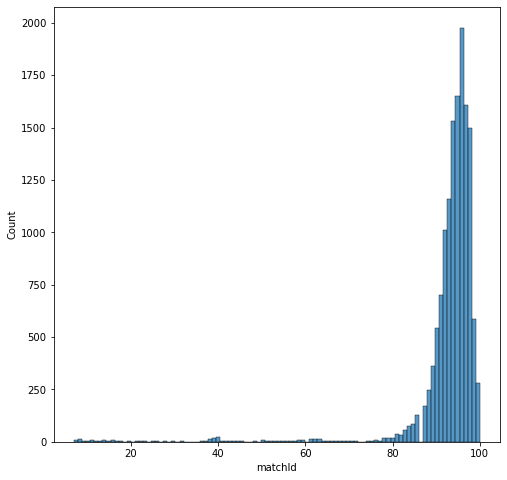

In [37]:

plt.figure(figsize=(8,8))
sns.histplot(data = duo_num, bins=100)
#plt.xticks(range(1, 4, 1))
plt.show() 

In [38]:
df_sqd = df[(df['matchType']=='squad') | (df['matchType']=='squad-fpp') | (df['matchType']=='normal-squad-fpp') | (df['matchType']=='normal-squad')]
df_sqd

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.000,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.000,0,0,13.5,1,1497,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0000,0,0.000,0,0,828.3,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4000,0,0.000,0,0,845.6,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.0,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.7,4,0,0.4815


In [39]:
sqd_num = df_sqd['matchId'].value_counts()
print("스쿼드 참여 인원 수 [평균]     : " , round(sqd_num.mean(),1))
print("스쿼드 참여 인원 수 [중간값]   : " , sqd_num.median())
print("스쿼드 참여 인원 수 [표준편차] : " , round(sqd_num.std(),1))
print("스쿼드 참여 인원 수 [최빈값]   : " , sqd_num.mode())

스쿼드 참여 인원 수 [평균]     :  93.7
스쿼드 참여 인원 수 [중간값]   :  95.0
스쿼드 참여 인원 수 [표준편차] :  8.1
스쿼드 참여 인원 수 [최빈값]   :  0    97
Name: matchId, dtype: int64


In [40]:
sqd_num2 = df_sqd['groupId'].value_counts()
print("스쿼드 그룹 인원 수 [평균]     : " , round(sqd_num2.mean(),1))
print("스쿼드 그룹 인원 수 [중간값]   : " , sqd_num2.median())
print("스쿼드 그룹 인원 수 [표준편차] : " , round(sqd_num2.std(),1))
print("스쿼드 그룹 인원 수 [최빈값]   : " , sqd_num2.mode())

스쿼드 그룹 인원 수 [평균]     :  3.5
스쿼드 그룹 인원 수 [중간값]   :  3.0
스쿼드 그룹 인원 수 [표준편차] :  1.7
스쿼드 그룹 인원 수 [최빈값]   :  0    3
Name: groupId, dtype: int64


In [41]:
print("스쿼드 그룹 수의 적정 범위 예측 : ", round(sqd_num.mean()/sqd_num2.mean(),1)," ~ ",round(sqd_num.median()/sqd_num2.median(),1))

스쿼드 그룹 수의 적정 범위 예측 :  26.8  ~  31.7


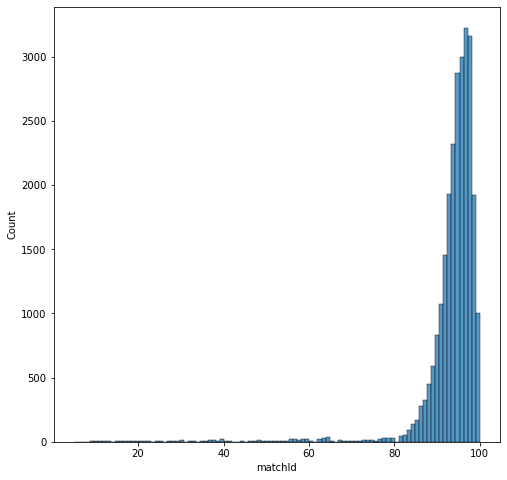

In [42]:
plt.figure(figsize=(8,8))
sns.histplot(data = sqd_num, bins=100)
#plt.xticks(range(1, 4, 1))
plt.show() 

In [43]:
df_evt = df[(df['matchType']=='crashfpp') | (df['matchType']=='flaretpp') | (df['matchType']=='flarefpp') | (df['matchType']=='crashtpp')]
df_evt

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1093,c8ed6a171536e3,84748458aba82a,d4f1811cf6a04b,1,3,187.40,0,1,6,27,...,0,0.0,0,0.0,0,0,1342.00,1,0,0.4898
1207,fb785deb59f2bc,4438f77ac9f2e6,33d976b454b843,0,4,576.80,7,2,4,6,...,1,2548.0,0,0.0,0,1,2563.00,6,0,0.8000
1276,d3c4dd2e585d21,6af9bb6b56b722,16e6befa897b44,0,0,0.00,0,0,0,88,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0000
1524,b0fbbe07014fcd,7ce6194a5dd609,e330f44c528e6f,0,0,20.94,0,0,0,55,...,0,0.0,0,0.0,0,0,13.64,1,0,0.0625
1790,28390372a2cc4f,c529d05da4597b,be945f2803814a,0,0,0.00,0,0,0,76,...,0,393.7,0,0.0,0,0,459.60,0,0,0.2041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440338,8df00ec3211cda,52d3feee3ff6d6,c35eb4e9d58f7c,2,0,220.80,0,1,0,18,...,0,1976.0,0,0.0,0,0,866.40,2,0,1.0000
4440416,03242437424b00,d00910fbc45b1e,510cec3dea92d7,3,4,444.50,2,0,0,2,...,0,5151.0,2,0.0,0,0,23.11,1,0,0.9333
4440956,9a366526fccde1,7172ba7ef85e3c,a0f8f127c472fc,2,6,219.40,1,0,1,14,...,0,4510.0,0,0.0,0,0,1059.00,2,0,0.8387
4441281,6bcc98a777c5e3,8c759f7e84c7d0,ed5d47d80ac351,0,0,300.00,2,0,0,4,...,0,7771.0,3,0.0,0,0,125.90,0,0,0.9149


In [44]:
evt_num = df_evt['matchId'].value_counts()
print("이벤트 [평균] 참여 인원 수 : " , evt_num.mean())
print("이벤트 참여 인원 수 [중간값] : " , evt_num.median())

이벤트 [평균] 참여 인원 수 :  85.18103448275862
이벤트 참여 인원 수 [중간값] :  90.0


In [45]:
evt_num2 = df_evt['groupId'].value_counts()
print("이벤트 그룹 수 [평균] : " , evt_num2.mean())
print("이벤트 그룹 수 [중간값] : " , evt_num2.median())

이벤트 그룹 수 [평균] :  2.349821640903686
이벤트 그룹 수 [중간값] :  2.0


In [46]:
print("이벤트 그룹 수의 적정 범위 예측 : ", round(evt_num.mean()/evt_num2.mean(),1)," ~ ",round(evt_num.median()/evt_num2.median(),1))

이벤트 그룹 수의 적정 범위 예측 :  36.2  ~  45.0


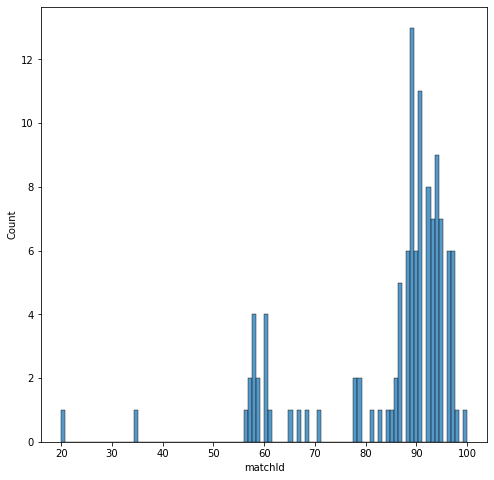

In [47]:
plt.figure(figsize=(8,8))
sns.histplot(data = evt_num, bins=100)
#plt.xticks(range(1, 4, 1))
plt.show() 

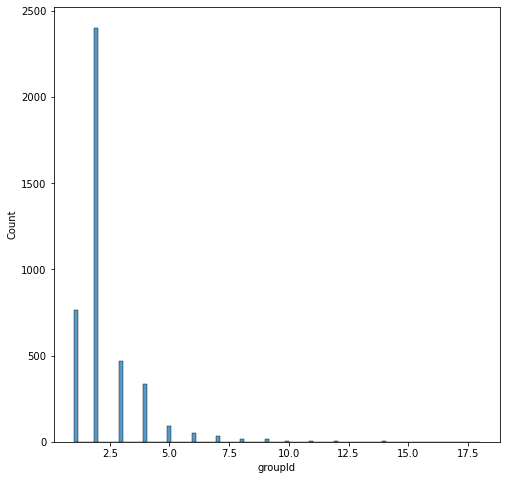

In [48]:
plt.figure(figsize=(8,8))
sns.histplot(data = evt_num2, bins=100)
#plt.xticks(range(1, 4, 1))
plt.show() 

위 내용을 토대로

##### 그룹의 수 적정범위(1차)
- 솔로 : 85~100
- 듀오 : 44~50
- 스쿼드: 25~32

##### 각 그룹의 인원 수
- 솔로 : 1명
- 듀오 : 1~2명
- 스쿼드 : 1~4명

#### 그룹의 수 적정범위(1차)
- 솔로 : 85~100
- 듀오 : 44~50
- 스쿼드: 25~32

##### 각 그룹의 인원 수
- 솔로 : 1명
- 듀오 : 1~2명
- 스쿼드 : 1~4명

In [50]:
df2 = train.copy()

In [64]:
# matchType 분류함수 +_+

matchType_list = df.matchType.unique().tolist()

def mT_list(match):
    list = []
    for i in range(len(matchType_list)):
        if match in matchType_list[i]:
            list.append(matchType_list[i])
        else:
            pass
    return list

print(mT_list('duo'))
print(mT_list('squad'))
print(mT_list('solo'))

['duo', 'duo-fpp', 'normal-duo-fpp', 'normal-duo']
['squad-fpp', 'squad', 'normal-squad-fpp', 'normal-squad']
['solo-fpp', 'solo', 'normal-solo-fpp', 'normal-solo']


In [65]:
def seek_bug_group(df, matchType, min_num, max_num):
    for i in mT_list(matchType):

        group_i = df.loc[df.matchType == i,:]

        min_i = group_i[group_i['numGroups'] < min_num]
        max_i = group_i[group_i['numGroups'] > max_num]

        print(
        '-----------------------------------------',
        f'{matchType} Type',
        '-----------------------------------------', sep='\n')
        print(
        '-----------------------------------------',
        f'{i}에서 최소 미만인 것들' ,
        '-----------------------------------------',
        min_i, sep='\n')

        print(
        '-----------------------------------------',
        f'{i}에서 최대 초과인 것들',
        '-----------------------------------------',
        max_i, sep='\n')

seek_bug_group(df, 'squad', 25, 32)
seek_bug_group(df, 'duo', 44, 50)
seek_bug_group(df, 'solo', 85, 100) 



-----------------------------------------
squad Type
-----------------------------------------
-----------------------------------------
squad-fpp에서 최소 미만인 것들
-----------------------------------------
                     Id         groupId         matchId  assists  boosts  \
65       b83ba80e820303  c7979543803b35  56369e162a028b        0       1   
95       7f3d7f85e7736e  6a86c130486275  8fde7d36c52447        1       0   
212      a36c04f88dced2  8d18d9587ea728  b8eb63ddd462ba        1       3   
235      7c61450e8aa934  fd7e90369b8392  0a66417e22d523        0       0   
303      1ec664488b014c  854f3e22d1b996  cf49e4b1eb8d2e        0       0   
...                 ...             ...             ...      ...     ...   
4446690  d2ebb2a77ba924  e6a9bc15e0f178  20e266f876854c        0       1   
4446798  3bac8f982634e5  34e49a6be295ec  8afcdee6055050        0       0   
4446829  4e45337c172f70  309d015f9aa286  7e27cc9127b0ca        0       0   
4446831  dcf22ad3ced424  2bd9f39244ce44

In [79]:
def seek_bug_group_min(temp, match, min_num):

    group_i = temp.loc[temp.matchType == match,:]

    min_i = group_i[group_i['numGroups']<min_num]

    return min_i


def seek_bug_group_max(temp, match, max_num):

    group_i = temp.loc[temp.matchType == match,:]

    max_i = group_i[group_i['numGroups']>max_num]

    return max_i
    

In [80]:
# squad min bug
squad_min_bug = seek_bug_group_min(df, 'squad', 25)                       # 65563 rows × 29 columns
squad_fpp_min_bug = seek_bug_group_min(df, 'squad-fpp', 25)               # 99801 rows × 31 columns
normal_squad_fpp_min_bug = seek_bug_group_min(df, 'normal-squad-fpp', 25) # 16986 rows × 31 columns
normal_squad_min_bug = seek_bug_group_min(df, 'normal-squad', 25)         # 417 rows × 29 columns

# duo min bug
duo_min_bug = seek_bug_group_min(df, 'duo', 44)                       # 52284 rows × 29 columns
duo_fpp_min_bug = seek_bug_group_min(df, 'duo-fpp', 44)               # 110003 rows × 29 columns
normal_duo_fpp_min_bug = seek_bug_group_min(df, 'normal-duo-fpp', 44) # 5391 rows × 29 columns
normal_duo_min_bug = seek_bug_group_min(df, 'normal-duo', 44)         # 5391 rows × 29 columns


# solo min bug
solo_fpp_min_bug = seek_bug_group_min(df, 'solo-fpp', 85)               # 12690 rows × 29 columns
solo_min_bug = seek_bug_group_min(df, 'solo', 85)                       # 12690 rows × 29 columns
normal_solo_fpp_min_bug = seek_bug_group_min(df, 'normal-solo-fpp', 85) # 1682 rows × 29 columns
normal_solo_min_bug = seek_bug_group_min(df, 'normal-solo', 85)         # 1682 rows × 29 columns

# squad max bug
squad_max_bug = seek_bug_group_max(df, 'squad', 32)
squad_fpp_max_bug = seek_bug_group_max(df, 'squad-fpp', 32)
normal_squad_fpp_max_bug = seek_bug_group_max(df, 'normal-squad-fpp', 32)
normal_squad_max_bug = seek_bug_group_max(df, 'normal-squad', 32)

# duo max bug
duo_max_bug= seek_bug_group_max(df, 'duo', 50)
duo_fpp_max_bug = seek_bug_group_max(df, 'duo-fpp', 50)
normal_duo_fpp_max_bug = seek_bug_group_max(df, 'normal-duo-fpp', 50)
normal_duo_max_bug = seek_bug_group_max(df, 'normal-duo', 50)

# solo max bug
solo_max_bug = seek_bug_group_max(df, 'solo', 100)
solo_fpp_max_bug = seek_bug_group_max(df, 'solo-fpp', 100)
normal_solo_fpp_max_bug = seek_bug_group_max(df, 'normal-solo-fpp', 100)
normal_solo_max_bug = seek_bug_group_max(df, 'normal-solo', 100)


In [84]:
# numGroup 실제 counting과 비교

df_flare = df[df.matchType.str.contains("flare")]

df_flare_fpp = df_flare[df_flare.matchType != "flaretpp"]

# matchId f1a007cdb3948e (26개의 팀)의 group 구성 인원 (96명)
df_flare_fpp.loc[df_flare_fpp.matchId == "f1a007cdb3948e", "groupId"].value_counts().shape[0] #26개의 팀
df_flare_fpp.loc[df_flare_fpp.matchId == "f1a007cdb3948e", "groupId"].value_counts().sum() #96명
df_flare_fpp.loc[df_flare_fpp.matchId == "f1a007cdb3948e", "groupId"].value_counts()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5388,bd43903feee617,61fd9b6eacd0ba,67c733f06f4f93,0,1,70.60,0,0,2,15,...,0,4309.0,0,108.7,0,0,2501.00,6,1500,0.6429
13529,525591bff835c6,f7baca9831628c,0600f86f11c6e4,1,0,328.40,3,1,5,19,...,1,0.0,0,0.0,0,0,547.60,4,0,0.4000
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0,0.0,0,0.0,0,0,0.00,8,0,0.8000
30682,7031ed9942560c,a2de06cdac7e94,67c733f06f4f93,1,6,511.90,1,0,6,6,...,1,6547.0,0,0.0,0,0,3358.00,7,1500,1.0000
34725,b3d15f5669b73d,2cea046b7d1dce,0600f86f11c6e4,1,0,156.60,0,0,5,37,...,0,0.0,0,0.0,0,0,414.20,10,0,0.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383079,5f3972edfee086,e44cf53385a554,dee96a550fcb70,0,3,974.40,0,6,10,3,...,0,0.0,0,0.0,0,0,333.30,12,1500,1.0000
4389155,bee606067ec3b7,2cbe6f54bc5159,67c733f06f4f93,0,3,0.00,0,0,1,31,...,0,237.0,0,0.0,0,0,3618.00,5,1500,0.4286
4420502,2ea2e15a73dc3a,5c1b2a1750c0a2,67c733f06f4f93,0,0,37.80,0,0,0,30,...,0,0.0,0,0.0,0,0,20.15,1,1500,0.5000
4423018,f772d7a2be33c2,598091d47a7841,0600f86f11c6e4,1,0,518.90,6,2,0,9,...,0,0.0,0,0.0,0,0,0.00,4,0,0.6000


In [78]:
# 위 47b400df2ef34e 의 그룹 수 6명 검증
df[(df['numGroups']==26)&(df['matchId']=="f1a007cdb3948e")]

what = df[(df['numGroups']==26)&(df['matchId']=="f1a007cdb3948e")]
what[what['groupId']=='47b400df2ef34e']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1351,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,...,0,0.0,0,0.00,0,0,29.570,9,1500,0.4737
6632,6ab29688a68902,398e7519c03ea8,4ed32be2abeae8,0,2,85.67,0,0,7,3,...,0,0.0,0,0.00,0,0,187.100,1,0,0.7778
9167,17d03b2b514847,70adbd957c8ef0,d5a8273156e459,0,3,364.40,0,2,0,1,...,0,1902.0,0,0.00,0,0,2468.000,2,0,0.9167
10894,736c7f405fe092,432bea96845811,d91a367407ed5f,1,0,256.20,0,1,0,16,...,0,0.0,0,0.00,0,0,8.202,2,0,0.7826
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0,0.0,0,0.00,0,0,0.000,13,0,0.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418629,871c3cc7a672e7,cdf486b986ac62,bf0b1ec5a38f7d,4,0,1634.00,0,2,0,7,...,0,3652.0,0,0.00,0,0,1026.000,34,0,0.6842
4420563,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.00,0,5,4,1,...,0,0.0,0,0.00,0,0,253.000,32,0,1.0000
4443350,ecbd5c19c0ec8f,0ee54ac0a6e019,3be803fb471be5,3,0,548.00,0,1,2,20,...,0,0.0,0,0.00,0,0,221.900,20,0,0.4783
4446682,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,...,0,0.0,0,0.00,0,0,0.000,4,0,0.9434


In [87]:
#Drop Concat

temp_1_min = pd.concat([squad_min_bug, squad_fpp_min_bug, normal_squad_fpp_min_bug, normal_squad_min_bug,
                    duo_min_bug, duo_fpp_min_bug, normal_duo_fpp_min_bug, normal_duo_min_bug, 
                    solo_fpp_min_bug, solo_min_bug, normal_solo_fpp_min_bug, normal_solo_min_bug], axis=0)

temp1_max = pd.concat([squad_max_bug, squad_fpp_max_bug, normal_squad_fpp_max_bug, normal_squad_max_bug,
                      duo_max_bug, duo_fpp_max_bug, normal_duo_fpp_max_bug, normal_duo_max_bug, 
                      solo_max_bug, solo_fpp_max_bug, normal_solo_fpp_max_bug, normal_solo_max_bug], axis=0)

temp_bug = pd.concat([temp1_max, temp_1_min], axis=0)

df = df.drop(temp_bug.index, axis=0)

In [88]:
# 이벤트 제거
df = df.drop(df[df.matchType.str.contains("flare")].index, axis=0)
df = df.drop(df[df.matchType.str.contains("crash")].index, axis=0)
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [89]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [90]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.319910,0.380812,0.294894,0.178444,0.229324,-0.292053,0.041606,0.288888,0.235713,...,0.201407,0.112715,0.012970,0.025545,0.002944,0.058558,0.302951,0.199976,0.024388,0.304573
boosts,0.319910,1.000000,0.544102,0.365636,0.348738,0.537475,-0.559987,0.004570,0.527895,0.409641,...,0.252326,0.324410,0.038939,0.109986,0.013893,0.085848,0.640823,0.437555,-0.012132,0.635744
damageDealt,0.380812,0.544102,1.000000,0.748828,0.602939,0.347768,-0.695410,0.051787,0.884050,0.709060,...,0.262565,0.144515,0.054575,0.039363,0.011365,0.082345,0.415792,0.314496,0.016683,0.451441
DBNOs,0.294894,0.365636,0.748828,1.000000,0.473352,0.267840,-0.565951,0.045944,0.723164,0.655343,...,0.300975,0.103567,0.038257,0.017968,0.070665,0.060083,0.290853,0.212195,0.013094,0.281544
headshotKills,0.178444,0.348738,0.602939,0.473352,1.000000,0.202414,-0.482145,0.023652,0.665788,0.511654,...,0.153060,0.079763,0.017256,0.029869,0.006692,0.041155,0.261852,0.191037,0.002823,0.283362
heals,0.229324,0.537475,0.347768,0.267840,0.202414,1.000000,-0.389035,-0.005455,0.317079,0.271061,...,0.236380,0.295569,0.028550,0.081463,0.035549,0.062856,0.432980,0.318068,-0.014747,0.429412
killPlace,-0.292053,-0.559987,-0.695410,-0.565951,-0.482145,-0.389035,1.000000,-0.022573,-0.755743,-0.820101,...,-0.271791,-0.232434,-0.056484,-0.091560,-0.037564,-0.072127,-0.596600,-0.507526,0.000156,-0.728495
killPoints,0.041606,0.004570,0.051787,0.045944,0.023652,-0.005455,-0.022573,1.000000,0.037730,0.037810,...,0.012758,-0.037710,-0.001027,-0.004885,-0.040378,-0.010113,-0.001293,-0.009144,0.983753,0.010260
kills,0.288888,0.527895,0.884050,0.723164,0.665788,0.317079,-0.755743,0.037730,1.000000,0.813106,...,0.260612,0.119899,0.062237,0.042129,0.013641,0.082092,0.394935,0.294297,0.005455,0.432010
killStreaks,0.235713,0.409641,0.709060,0.655343,0.511654,0.271061,-0.820101,0.037810,0.813106,1.000000,...,0.243083,0.097895,0.057895,0.035270,0.026005,0.062745,0.331136,0.270938,0.008349,0.377783


Index(['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'damageDealt', 'heals'],
      
      에서
      
Index(['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'damageDealt', 'kills'],
      
      로 바뀜

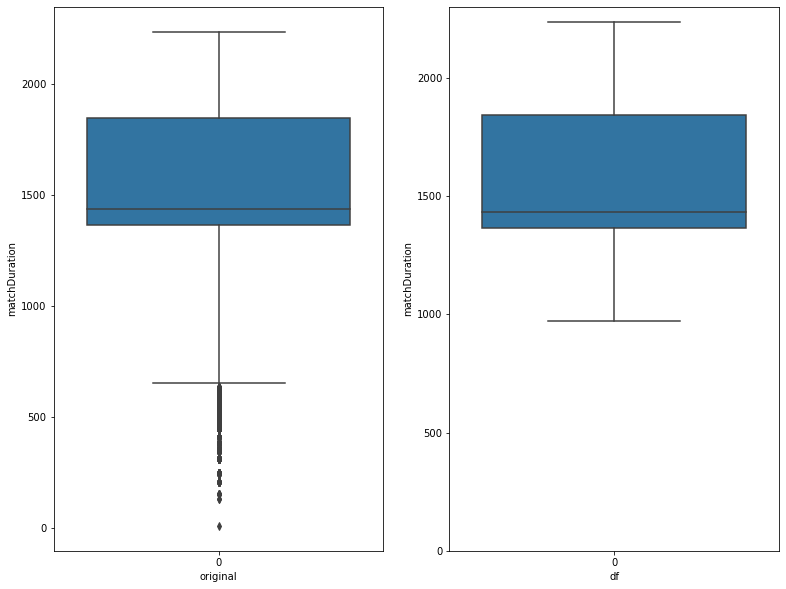

In [192]:
# matchDuration 게임시간 (단위:초) #matchDuration 시 아웃라이어가 사라짐


plt.figure(figsize=(13,10))
plt.subplot(1,2,1)
sns.boxplot(data=train.matchDuration)
plt.xlabel('original')
plt.ylabel('matchDuration')

plt.subplot(1,2,2)
sns.boxplot(data=df.matchDuration)
plt.xlabel('df')
plt.ylabel('matchDuration')

plt.ylim(0, 2300)
plt.show()

# 전처리한 df 데이터 다시 확인

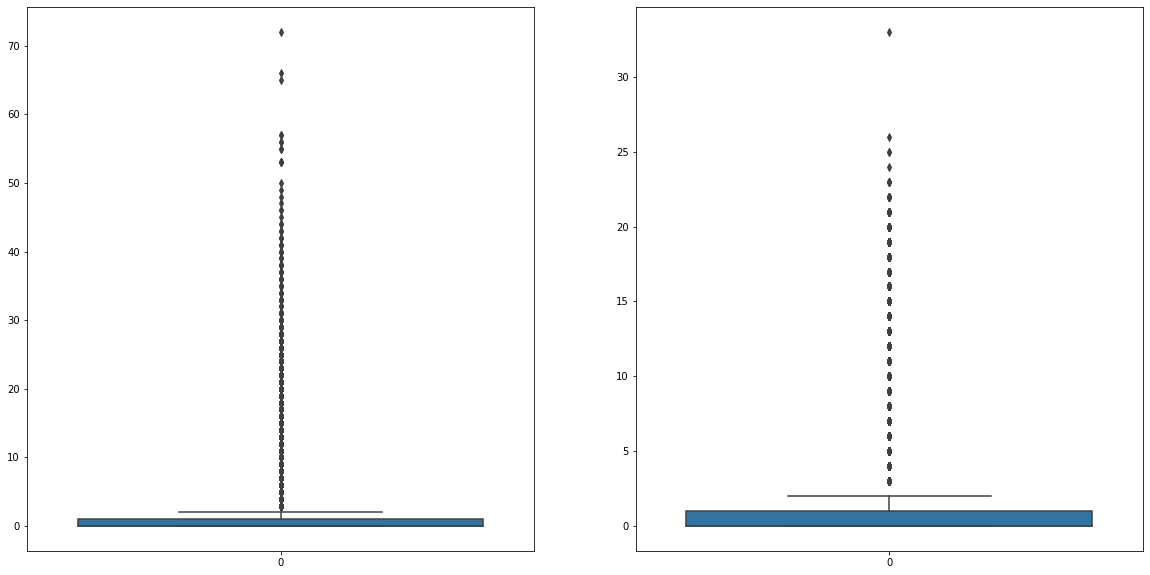

<Figure size 1440x1440 with 0 Axes>

In [178]:
# 원본 데이터

f, axis = plt.subplots(1, 2, figsize=(20,10))

plt.figure(figsize=(20,20))
sns.boxplot( data=train.kills,  ax=axis[0])
sns.boxplot( data=df.kills,  ax=axis[1])

plt.show()



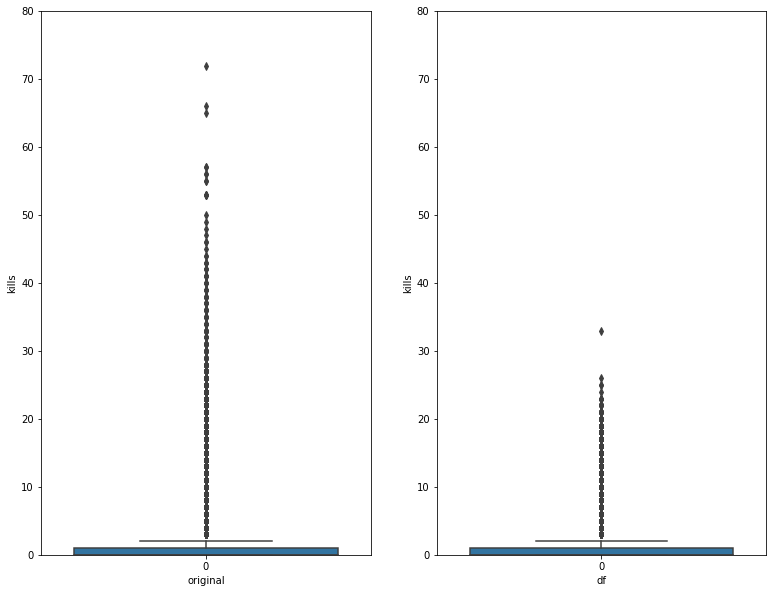

In [206]:
plt.figure(figsize=(13,10))
plt.subplot(1,2,1)
sns.boxplot(data=train.kills)
plt.xlabel('original')
plt.ylabel('kills')
plt.ylim(0, 80)

plt.subplot(1,2,2)
sns.boxplot(data=df.kills)
plt.xlabel('df')
plt.ylabel('kills')
plt.ylim(0, 80)

plt.show()

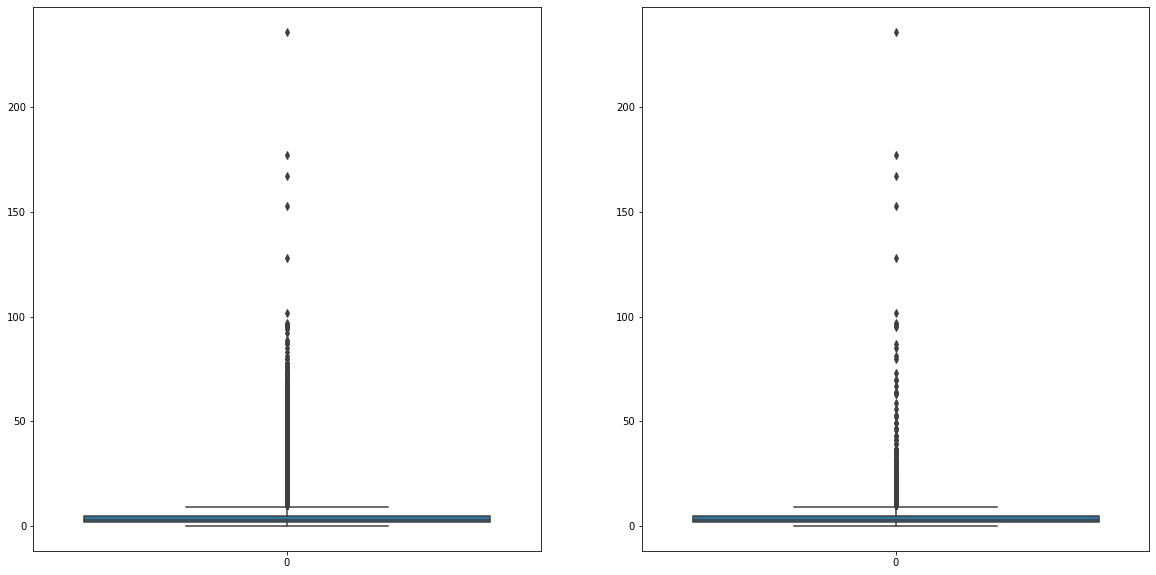

<Figure size 1440x1440 with 0 Axes>

In [169]:
# 원본 데이터

f, axis = plt.subplots(1, 2, figsize=(20,10))

plt.figure(figsize=(20,20))
sns.boxplot( data=train.weaponsAcquired,  ax=axis[0])
sns.boxplot( data=df.weaponsAcquired,  ax=axis[1])

plt.show()



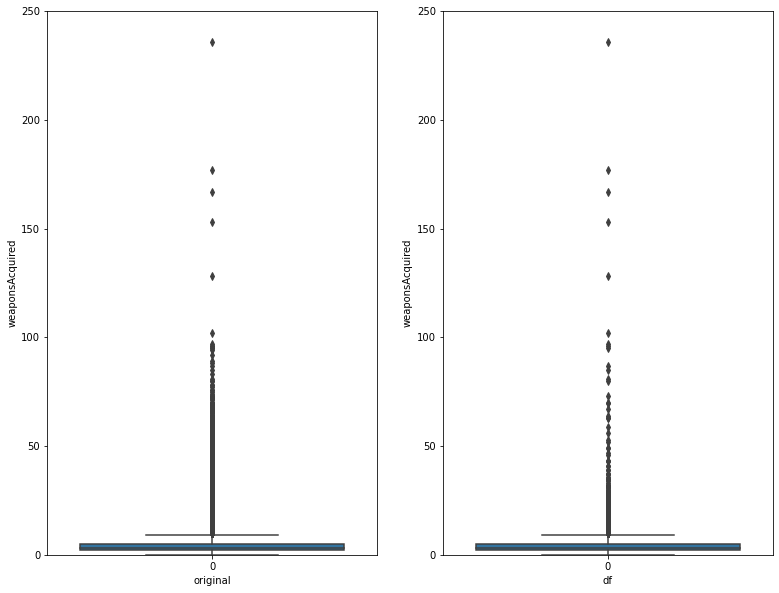

In [205]:
plt.figure(figsize=(13,10))
plt.subplot(1,2,1)
sns.boxplot(data=train.weaponsAcquired)
plt.xlabel('original')
plt.ylabel('weaponsAcquired')
plt.ylim(0, 250)

plt.subplot(1,2,2)
sns.boxplot(data=df.weaponsAcquired)
plt.xlabel('df')
plt.ylabel('weaponsAcquired')

plt.ylim(0, 250)
plt.show()

In [196]:
# weaponsAcquired


#### 솔로나 듀오에서 그룹 내 플레이어들이 비정상적으로 많은 경우들

- 가설: 잠수나 게임에서 튕겨진 플레이어들을 한 그룹으로 묶은 것?
- 데이터분석
    1. 분석대상 : 솔로 case sample(그룹id: 410ebf97a0e9c4), 듀오 case sample(그룹id: 2cca03493e03a6)
    2. 분석: 아래 코드 참고
    3. 결과: 움직임이 대부분 없고, 움직임이 있어도 매우 적음 / 게임 지속시간이 전부 동일
    4. 해석: 잠수나 게임에서 튕겨진 플레이어들일 것이다.
    5. 모델에 주는 영향: 모델이 같은 그룹으로 묶인 플레이어들이 움직임이 매우 적고 동시에 죽은 플레이어들의 순위를 낮게 측정할 것